In [2]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [35]:
# Load the dataset
df = pd.read_csv("student-mat.csv")

In [37]:
# Display first 5 rows
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [39]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [41]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

In [43]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [45]:
# Check column data types
print("\nColumn Data Types:\n", df.dtypes)


Column Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [47]:
# Find dataset size
print("\nDataset Size:", df.shape)


Dataset Size: (395, 33)


In [49]:
# Compute the average final grade (G3)
avg_g3 = df["G3"].mean()
print(f"\nAverage Final Grade: {avg_g3}")


Average Final Grade: 10.415189873417722


In [51]:
# Find students scoring above 15
high_scorers = df[df["G3"] > 15].shape[0]
print(f"Students scoring above 15: {high_scorers}")

Students scoring above 15: 40


In [53]:
# Check correlation between study time and final grade
correlation = df["studytime"].corr(df["G3"])
print(f"\nCorrelation between study time and final grade: {correlation}")


Correlation between study time and final grade: 0.0978196896531963


In [55]:
# Compare average final grade by gender
avg_grade_by_gender = df.groupby("sex")["G3"].mean()
print("\nAverage Final Grade by Gender:\n", avg_grade_by_gender)


Average Final Grade by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


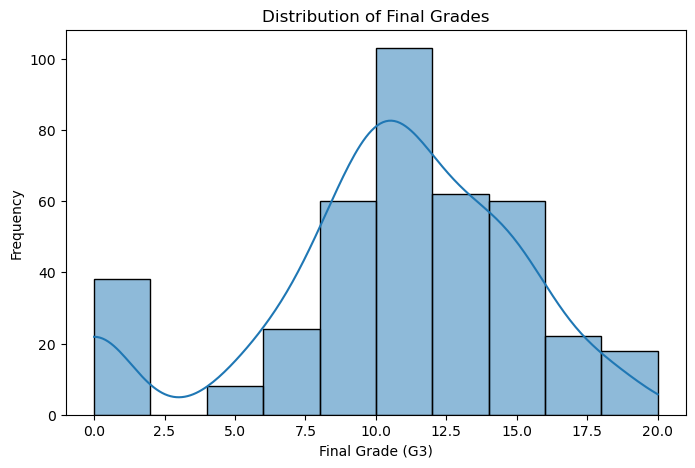

In [57]:
# Histogram of final grades (G3)
plt.figure(figsize=(8,5))
sns.histplot(df["G3"], bins=10, kde=True)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

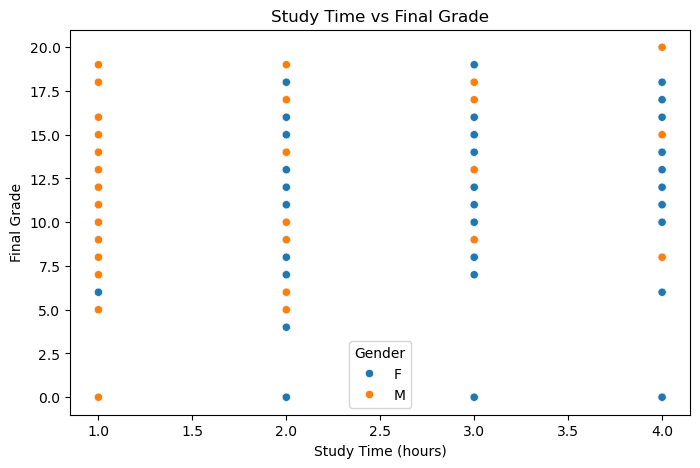

In [59]:
# Scatter plot of study time vs. final grade
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="studytime", y="G3", hue="sex")
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade")
plt.legend(title="Gender")
plt.show()

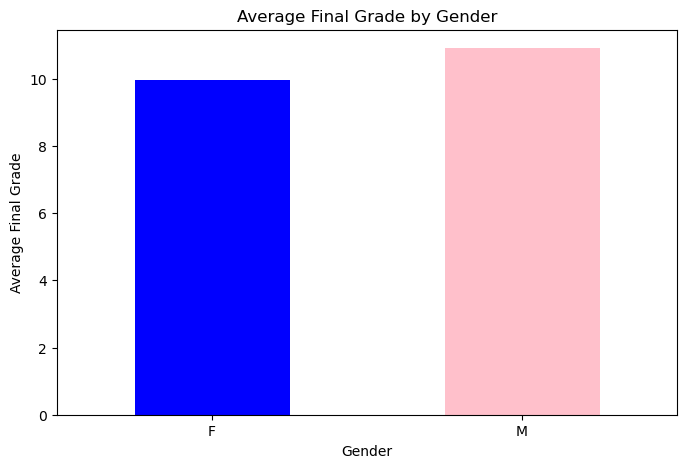

In [61]:
# Bar chart of average scores by gender
plt.figure(figsize=(8,5))
avg_grade_by_gender.plot(kind="bar", color=['blue', 'pink'])
plt.title("Average Final Grade by Gender")
plt.ylabel("Average Final Grade")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()